In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

# Download stock data
df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")

df.head()

/tmp/ipython-input-1004836308.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.214891,24.682224,23.776352,24.671149,212818400
2015-01-05,23.532722,24.064285,23.346676,23.984551,257142000
2015-01-06,23.534935,23.794071,23.173914,23.596950,263188400
2015-01-07,23.864948,23.964616,23.632389,23.743131,160423600
2015-01-08,24.781897,24.839483,24.075361,24.192749,237458000


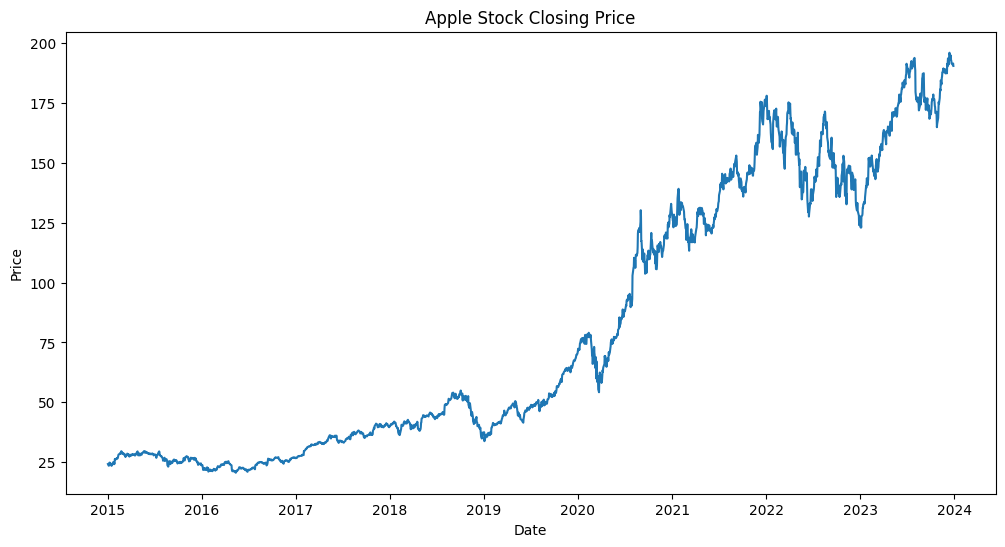

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Apple Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [4]:
df = df[['Close']]
df = df.reset_index()

df['Day'] = range(len(df))

X = df[['Day']]
y = df['Close']

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

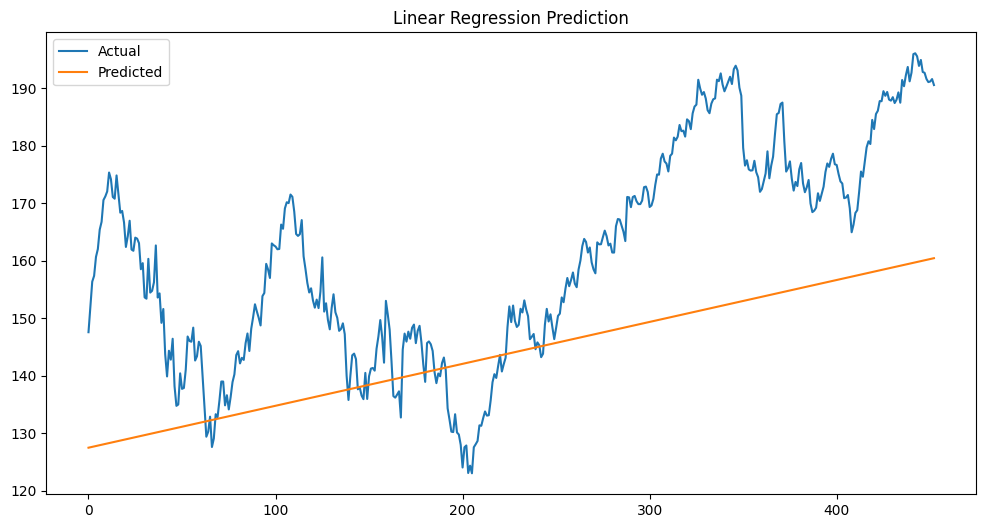

In [6]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title("Linear Regression Prediction")
plt.show()

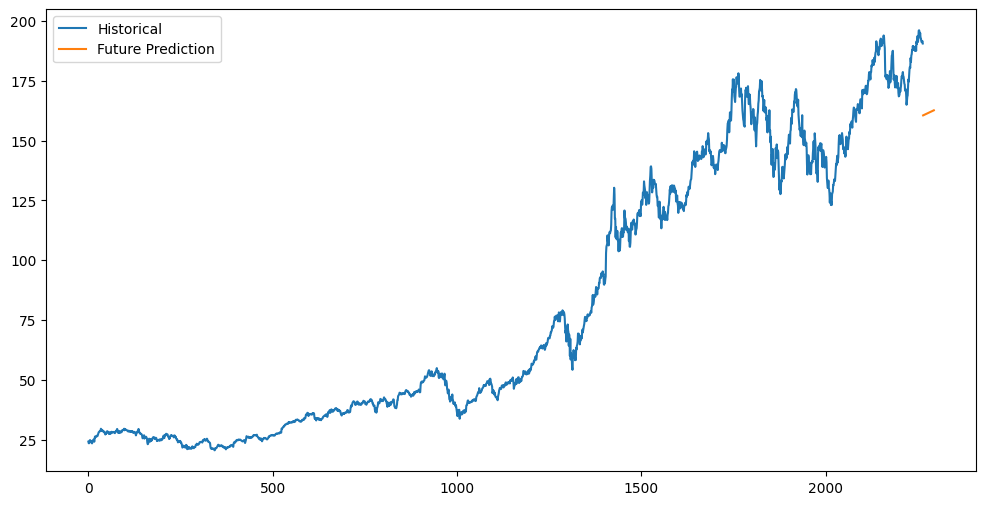

In [7]:
future_days = 30
last_day = df['Day'].iloc[-1]

future_X = [[last_day + i] for i in range(1, future_days+1)]

future_predictions = model.predict(future_X)

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Historical")
plt.plot(range(len(df), len(df)+future_days), future_predictions, label="Future Prediction")
plt.legend()
plt.show()

In [8]:
!pip install tensorflow

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

# Define time_step (number of previous time steps to consider)
time_step = 60 # You can adjust this value

# Create sequences for LSTM
X_lstm, y_lstm = [], []
for i in range(len(scaled_data) - time_step - 1):
    a = scaled_data[i:(i + time_step), 0]
    X_lstm.append(a)
    y_lstm.append(scaled_data[i + time_step, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Reshape X_lstm for LSTM input: (samples, time_steps, features)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0370
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 5.5617e-04
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 5.4782e-04
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 4.8610e-04
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 5.5433e-04
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 4.8993e-04
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 5.1048e-04
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 4.8199e-04
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 4.5419e-04
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3.8928e-04


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 9884.7979
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8619.3926
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7413.7588
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7109.1846
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6772.2339
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6500.3745
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6416.3047
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5721.6177
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5590.8721
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5172.1704


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


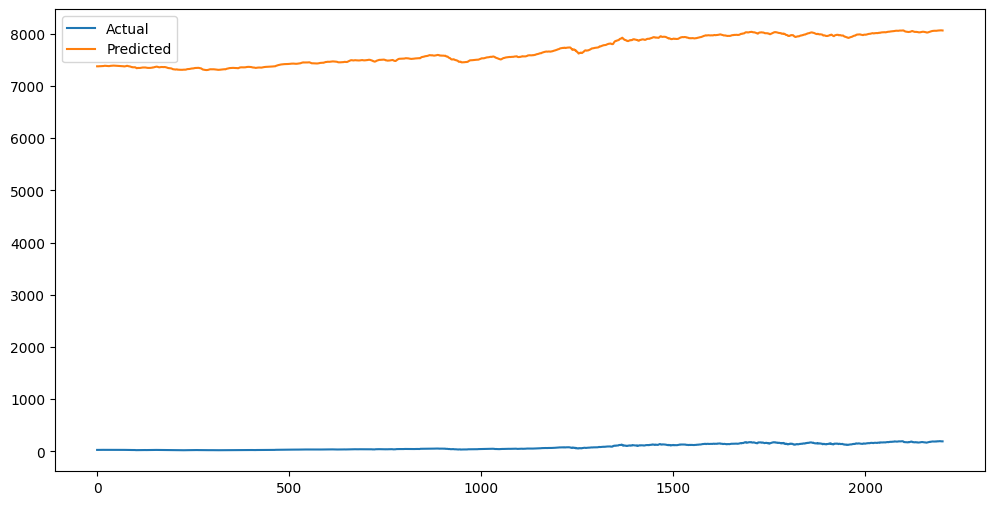

In [15]:
predicted = model.predict(X_lstm)

predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_lstm.reshape(-1,1))

plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual")
plt.plot(predicted, label="Predicted")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

RMSE: 21.86204263817582


In [17]:
!pip install yfinance ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6c1c2f5009158824e5f780dda60d8d2160c0a1f1ac641e2abc80a32671714066
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [18]:
import yfinance as yf
import pandas as pd

df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
df.head()

/tmp/ipython-input-4169764035.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.214891,24.682224,23.776352,24.671149,212818400
2015-01-05,23.532722,24.064285,23.346676,23.984551,257142000
2015-01-06,23.534935,23.794071,23.173914,23.596950,263188400
2015-01-07,23.864948,23.964616,23.632389,23.743131,160423600
2015-01-08,24.781897,24.839483,24.075361,24.192749,237458000


In [22]:
import ta

# RSI
df['RSI'] = ta.momentum.RSIIndicator(df['Close'].squeeze()).rsi()

# MACD
macd = ta.trend.MACD(df['Close'].squeeze())
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

df = df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2015-02-20,28.795435,28.795435,28.473016,28.599758,195793600,78.737122,1.053482,0.907202
2015-02-23,29.573694,29.573694,28.831017,28.911067,283896400,82.379115,1.121778,0.950117
2015-02-24,29.389130,29.707104,29.166771,29.560347,276912400,78.926496,1.147779,0.989649
2015-02-25,28.637554,29.262385,28.495245,29.253488,298846800,66.672274,1.095115,1.010742
2015-02-26,28.999998,29.100059,28.152813,28.637553,365150000,69.159086,1.070288,1.022651


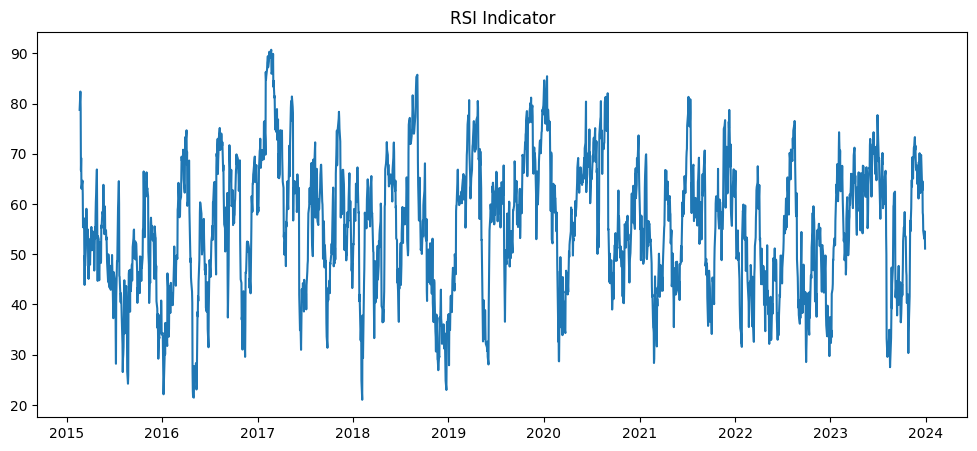

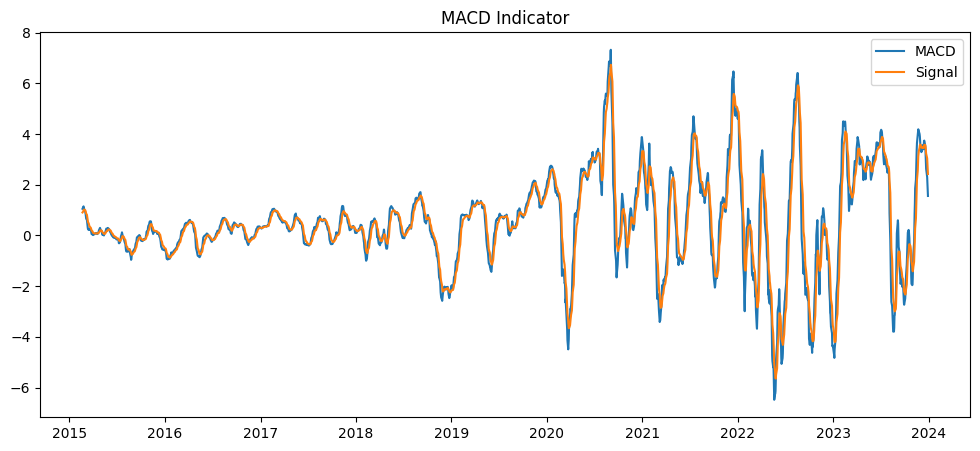

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['RSI'])
plt.title("RSI Indicator")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df['MACD'], label="MACD")
plt.plot(df['MACD_Signal'], label="Signal")
plt.legend()
plt.title("MACD Indicator")
plt.show()

In [24]:
features = ['Open','High','Low','Close','Volume','RSI','MACD','MACD_Signal']
data = df[features]

In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [26]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step)])
        y.append(data[i+time_step][3])  # Close price index
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0239
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 5.6719e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 4.1558e-04
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 3.6949e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 3.3870e-04
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 3.6183e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.7327e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.0155e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 2.8480e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 2.7942e-04


68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step


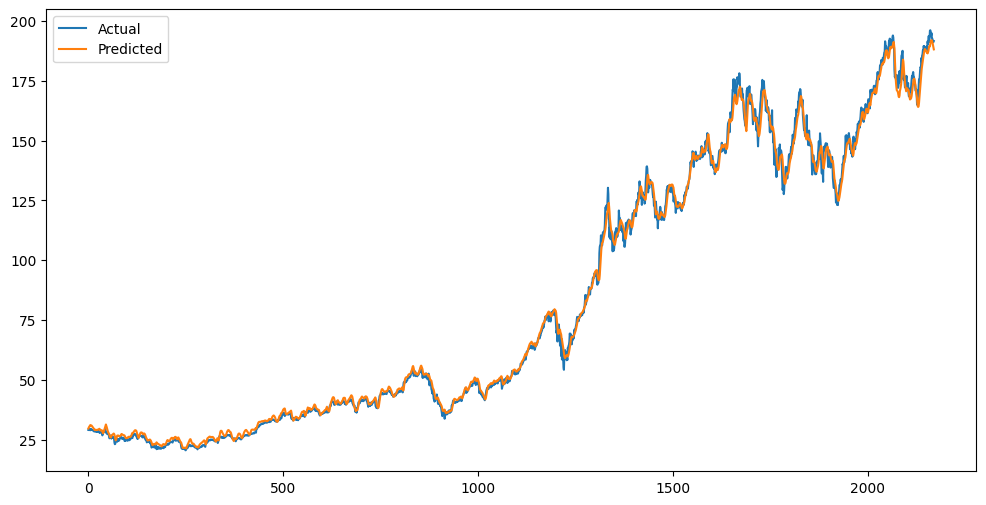

In [28]:
predicted = model.predict(X)

# Only inverse close column
close_scaler = MinMaxScaler()
close_scaler.fit(df[['Close']])

predicted_prices = close_scaler.inverse_transform(predicted.reshape(-1,1))
actual_prices = close_scaler.inverse_transform(y.reshape(-1,1))

plt.figure(figsize=(12,6))
plt.plot(actual_prices, label="Actual")
plt.plot(predicted_prices, label="Predicted")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print("RMSE:", rmse)

RMSE: 2.7285558804396524
